## <font color='green'> <div align="center">In the name of God </div></font>

### <font color='red'> Author: Sayed Kamaledin Ghiasi-Shrirazi</font> <a href="http://profsite.um.ac.ir/~k.ghiasi">(http://profsite.um.ac.ir/~k.ghiasi)</a> 

### Asymmetric Hopfield Network with Gardner algorithm (which is Perceptron) on MNIST clusters

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
from tqdm import tqdm
import matplotlib.animation as animation
import sklearn.cluster
import pickle
import os.path

In [2]:
%matplotlib inline
mpl.rcParams['figure.dpi']= 600

In [3]:
MnistTrainX = sio.loadmat ('../../datasets/mnist/MnistTrainX')['MnistTrainX'] / 255;
MnistTrainY = sio.loadmat ('../../datasets/mnist/MnistTrainY')['MnistTrainY'];
MnistTestX  = sio.loadmat ('../../datasets/mnist/MnistTestX')['MnistTestX'] / 255;
MnistTestY  = sio.loadmat ('../../datasets/mnist/MnistTestY')['MnistTestY'];

N = 60000
MnistTrainX = MnistTrainX[:N,:]
MnistTrainY = MnistTrainY[:N,:]
XTrain = MnistTrainX
yTrain = MnistTrainY.squeeze()
XTest = MnistTestX
yTest = MnistTestY.squeeze()
N, dim = XTrain.shape

In [4]:
C = 10
K = 6
maxVqIteration = 100

np.random.seed(1)
filename = 'mnist_{}_clusters.pickle'.format(K)
if os.path.isfile(filename):
    with open(filename, 'rb') as file:
        centers = pickle.load(file)
else:
    clusAlg = sklearn.cluster.KMeans()
    clusAlg.max_iter = maxVqIteration
    centers = np.zeros ([C*K, dim])

    for c in range (C):
        Xi = XTrain[yTrain == c,:]
        clusAlg.n_clusters = K
        clusAlg.fit(Xi)
        for k in range(K):
            centers[c*K+k,:] = np.mean(Xi[clusAlg.labels_ == k, :],axis = 0) 
    with open(filename, 'wb') as file:
        pickle.dump(centers, file)

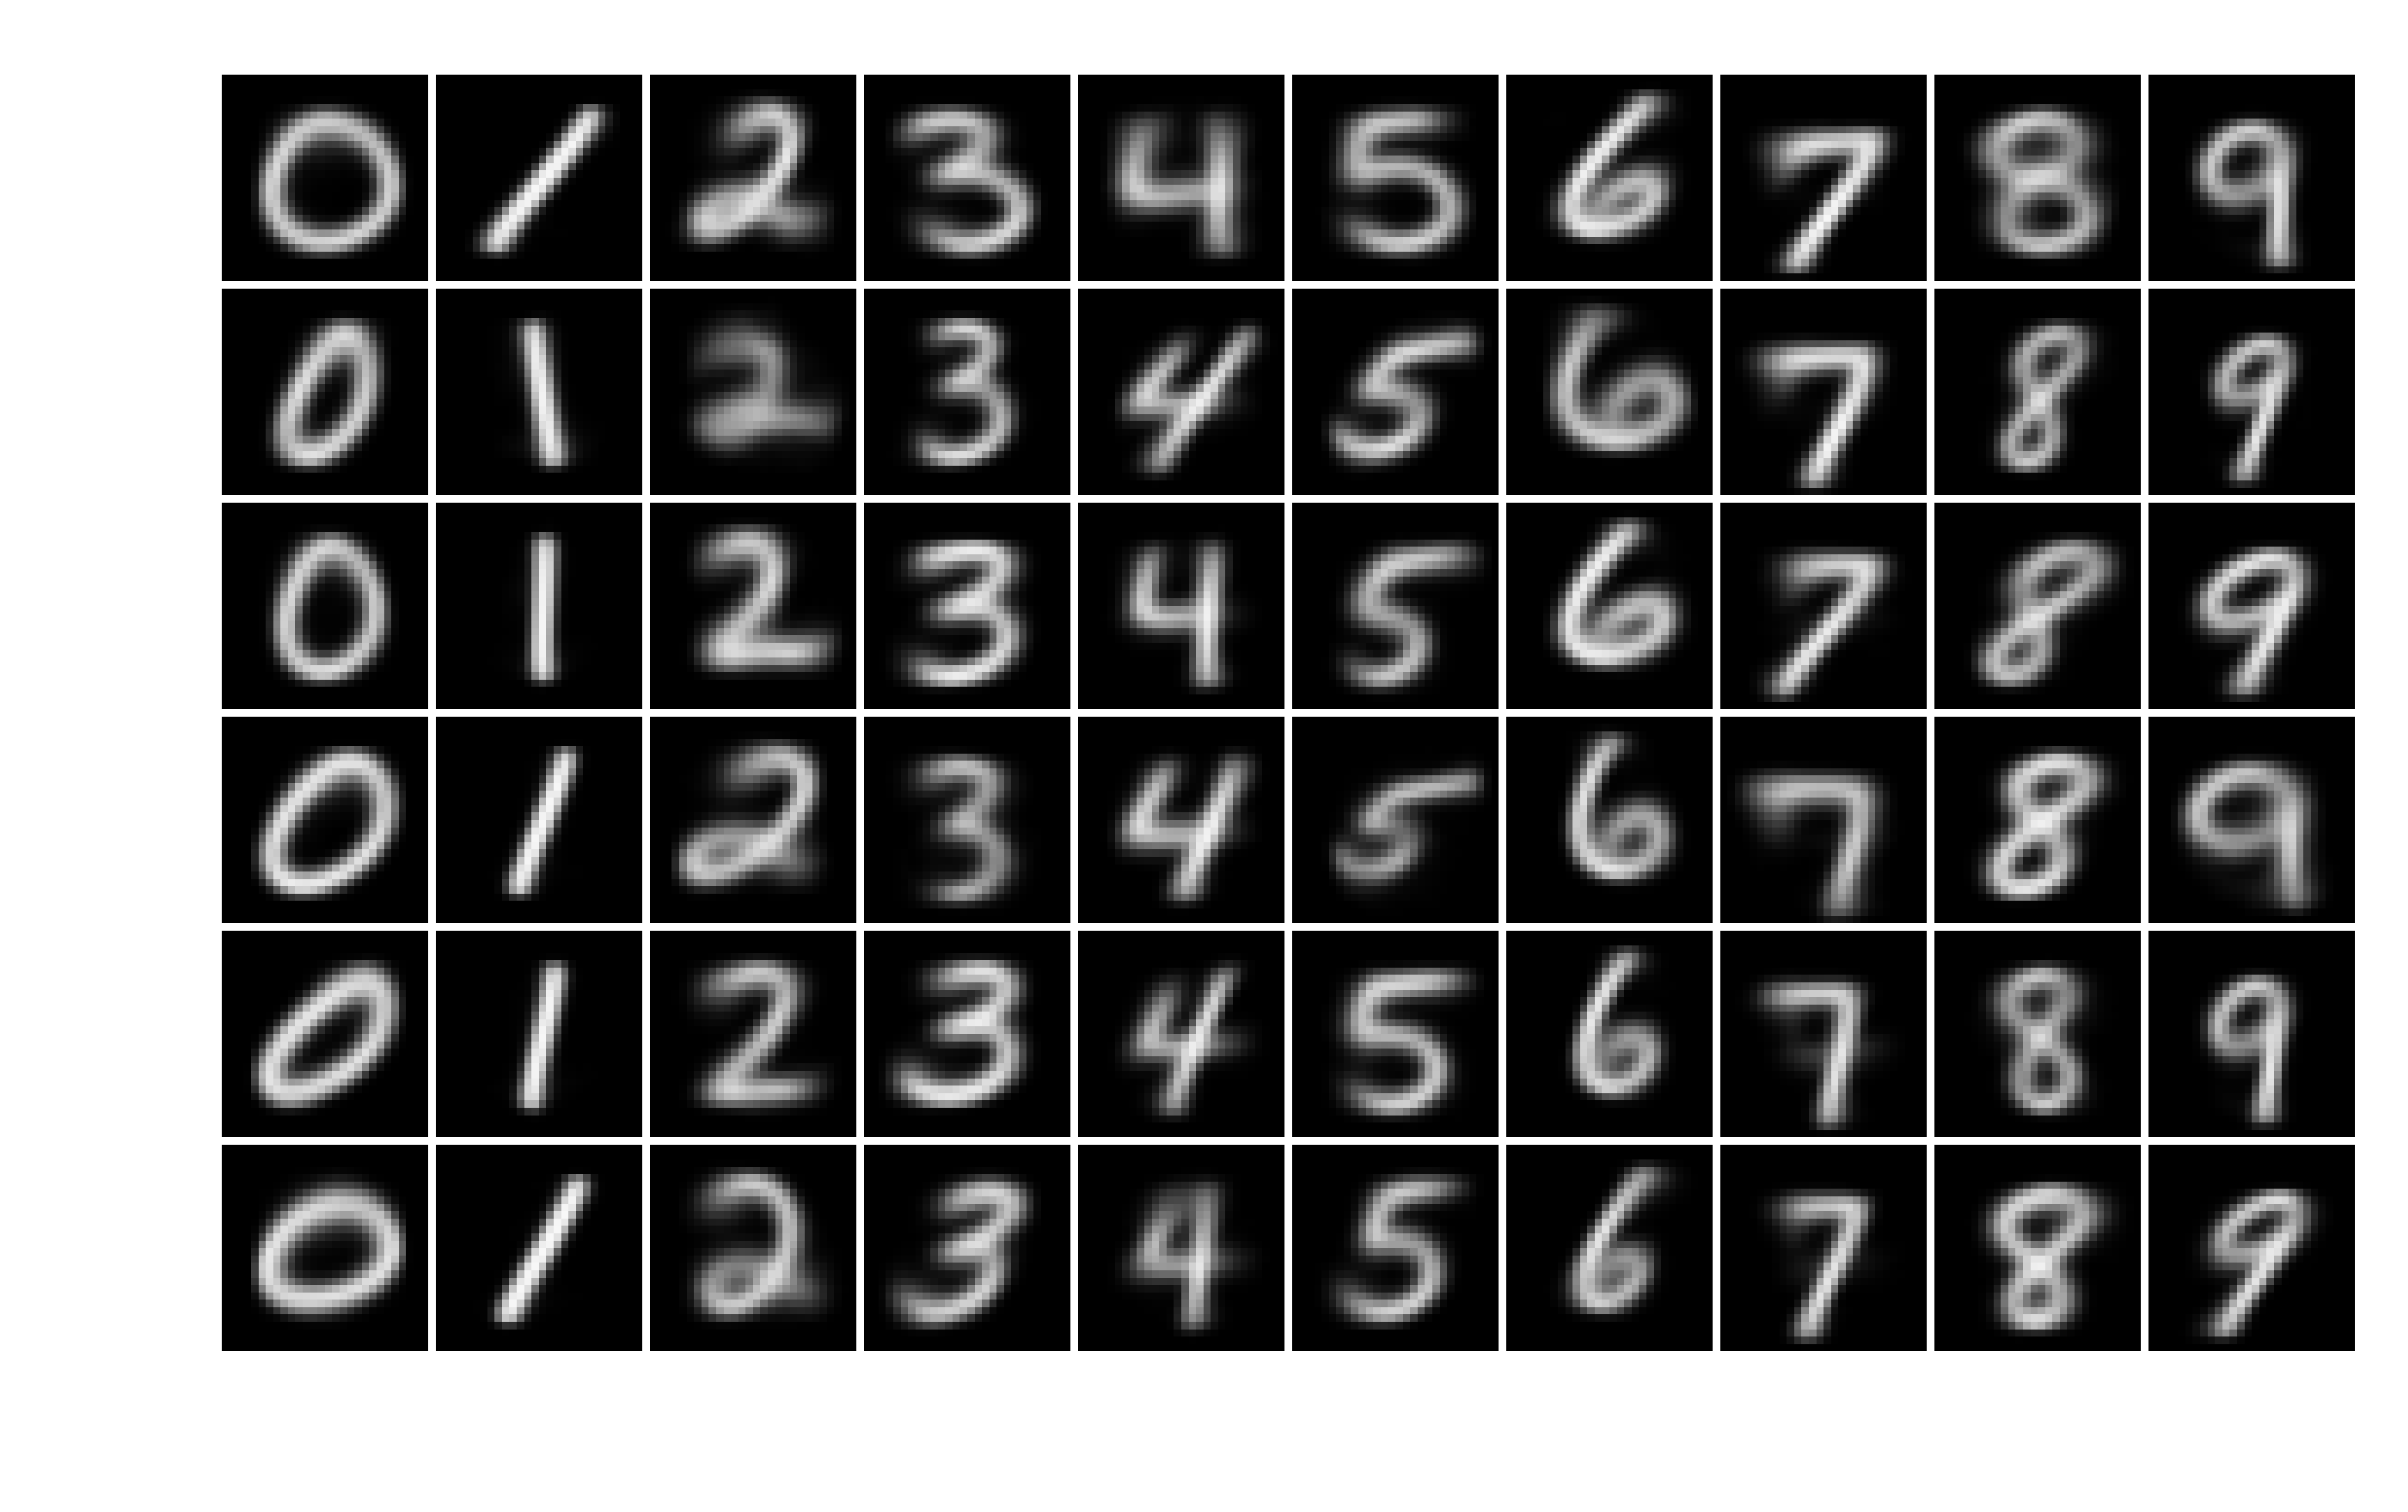

In [5]:
width = height = 28
img = np.ones ([1+K*(height+1), 1+C * (width+1),3])
for c in range(C):
    for k in range (K):
        idx1 = k*(height+1)+1
        idx2 = c*(width+1)+1
        img[idx1:idx1+height, idx2:idx2+width,0] = centers[c*K+k].reshape ([height,width])
        img[idx1:idx1+height, idx2:idx2+width,1] = img[idx1:idx1+height, idx2:idx2+width,0]
        img[idx1:idx1+height, idx2:idx2+width,2] = img[idx1:idx1+height, idx2:idx2+width,0]
plt.axis('off')
plt.imshow (img)
plt.show()

In [6]:
centers_binary = np.sign(centers-0.5)
XTest_binary = np.sign(MnistTestX - 0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


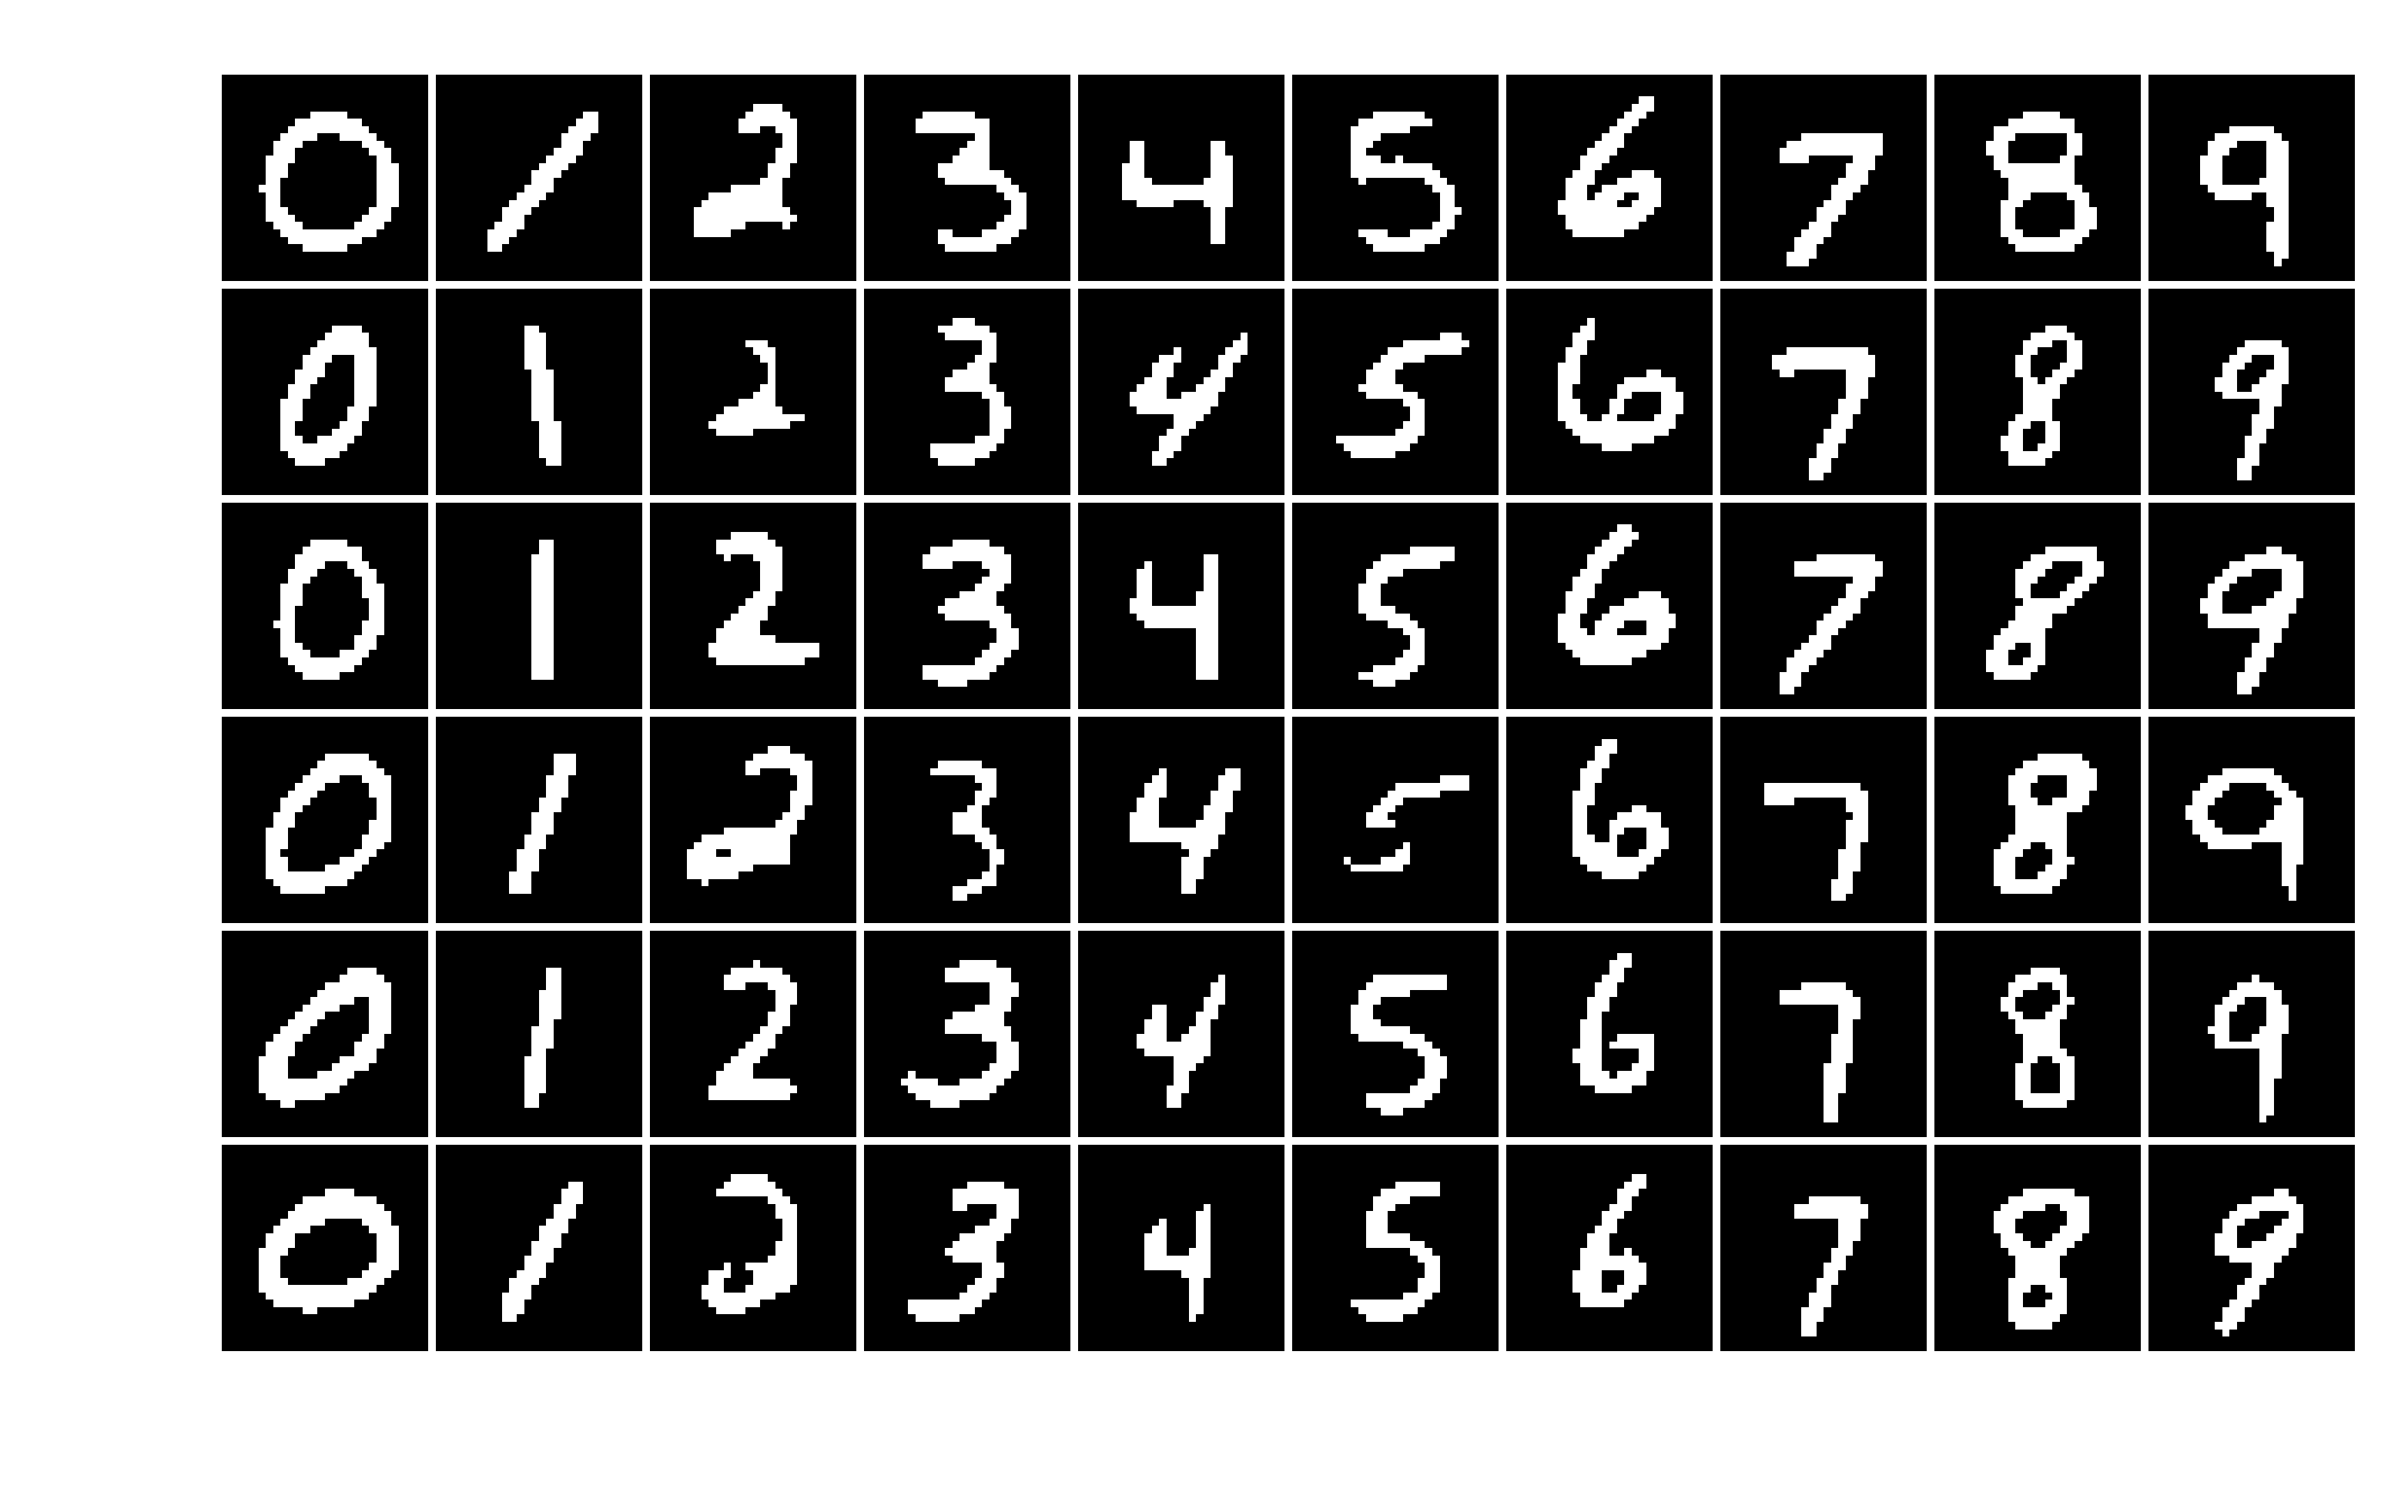

In [24]:
width = height = 28
img = np.ones ([1+K*(height+1), 1+C * (width+1),3])
for c in range(C):
    for k in range (K):
        idx1 = k*(height+1)+1
        idx2 = c*(width+1)+1
        img[idx1:idx1+height, idx2:idx2+width,0] = centers_binary[c*K+k].reshape ([height,width])
        img[idx1:idx1+height, idx2:idx2+width,1] = img[idx1:idx1+height, idx2:idx2+width,0]
        img[idx1:idx1+height, idx2:idx2+width,2] = img[idx1:idx1+height, idx2:idx2+width,0]
plt.axis('off')
plt.imshow (img)
plt.show()

In [8]:
maxEpoch = 10
XTrain = centers_binary
(N, dim) = XTrain.shape
W = np.random.rand (dim, dim)
b = np.zeros (dim)
for epoch in range (maxEpoch):
    for n in range (N):
        x = XTrain[n,:]
        z = W @ x + b
        y = np.sign (z)
        t = x
        deltaW = np.outer ((t - y) / 2 , x.T)
        W = W + deltaW
        b = b + (t - y) / 2
for d in range (dim):
    W[d,d] = 0

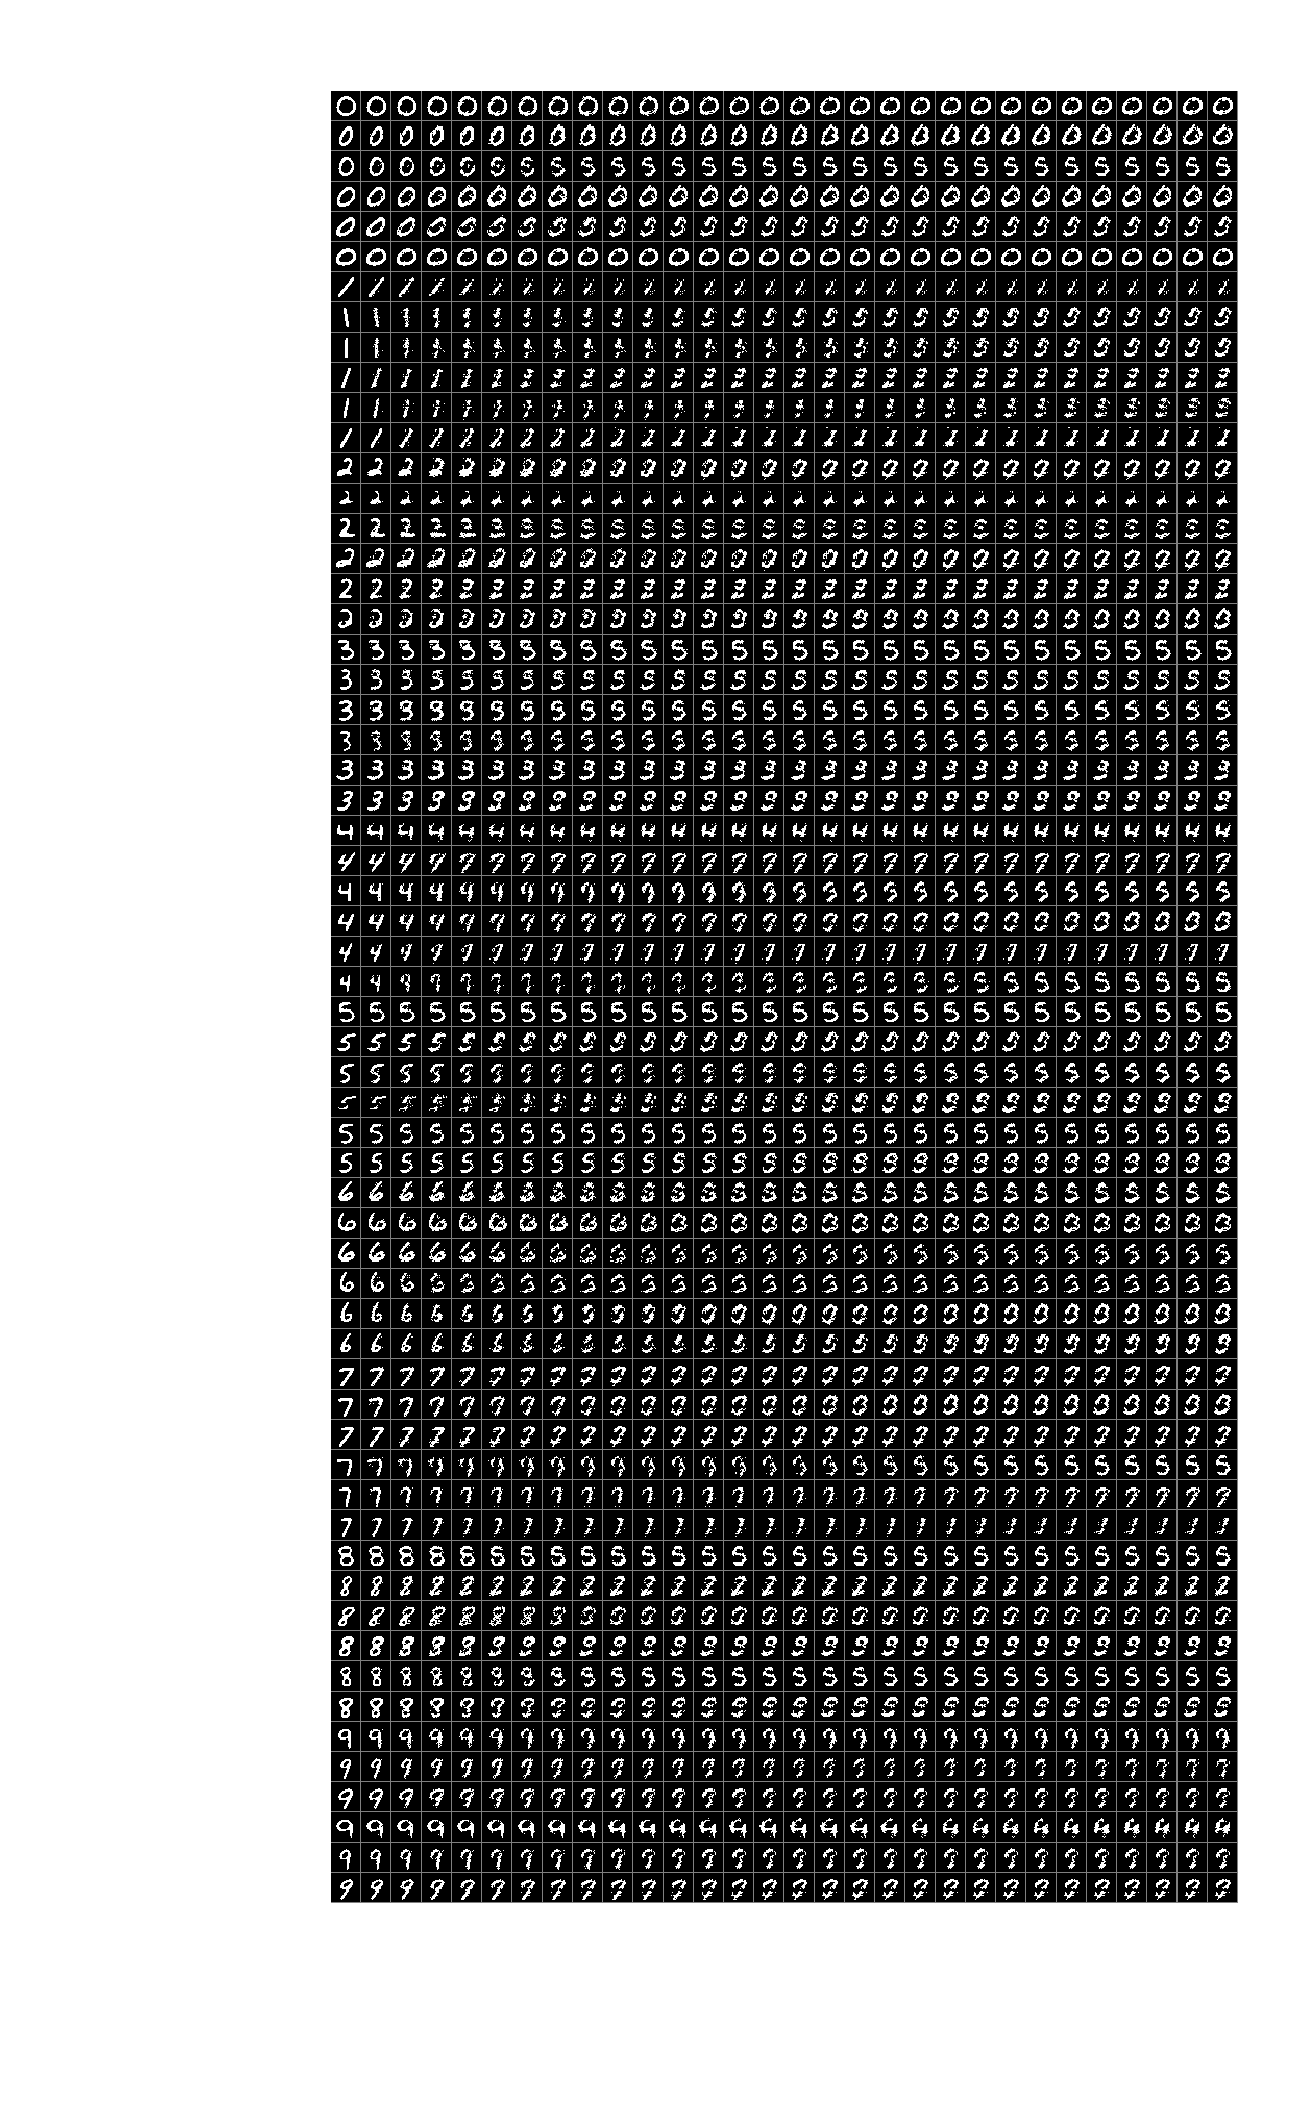

In [10]:
maxHopfieldIter = 30
img = np.zeros ([29 * N,29 * maxHopfieldIter])
for n in range (N):
    x = XTrain[n,:]
    for i in range (maxHopfieldIter):
        img[n*29:n*29+28,i*29:i*29+28] = np.reshape(x,[28,28])
        z = W @ x + b
        y = np.sign(z)
        x = y
plt.axis('off')        
plt.imshow (img,cmap='gray')
plt.imsave ('hopfield_gardner_on_clusters_mnist.png', img,cmap='gray')
plt.show()